1- Encontrar la función de transferencia del moving average. (Para esto deben definir un algoritmo de moving average y extraer su firma/transferencia).

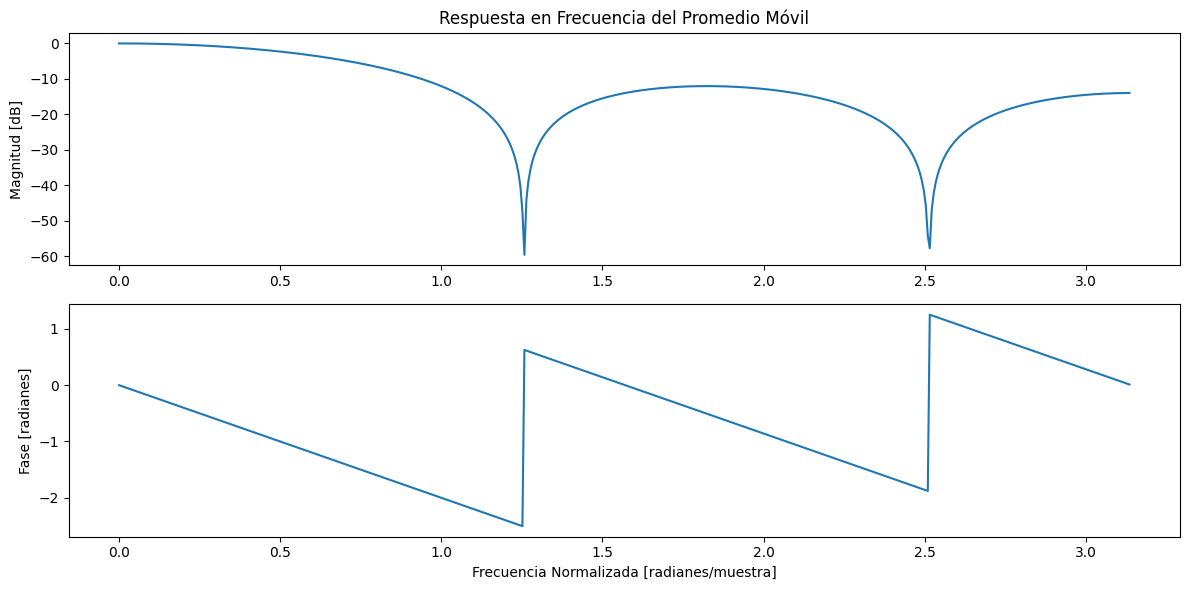

In [4]:
######    extracción de transferencia

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

def moving_average_transfer_function(window_size):
    # Coeficientes del filtro FIR del promedio móvil
    b = np.ones(window_size) / window_size
    a = 1  # Es un filtro FIR, por lo tanto el denominador es 1
    
    # Calculamos la respuesta en frecuencia
    w, h = signal.freqz(b, a)
    
    # Mostramos la magnitud y la fase de la función de transferencia
    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 1, 1)
    plt.title('Respuesta en Frecuencia del Promedio Móvil')
    plt.plot(w, 20 * np.log10(abs(h)))
    plt.ylabel('Magnitud [dB]')
    
    plt.subplot(2, 1, 2)
    plt.plot(w, np.angle(h))
    plt.ylabel('Fase [radianes]')
    plt.xlabel('Frecuencia Normalizada [radianes/muestra]')
    
    plt.tight_layout()
    plt.show()

# Ejemplo de uso para una ventana de tamaño 5
moving_average_transfer_function(window_size=5)

2- Inyectar al moving average una cuadrada de amplitud 1 y frecuencia 2KHz y una triangular de amplitud 1 y frecuencia 1KHz. Analizar los resultados.

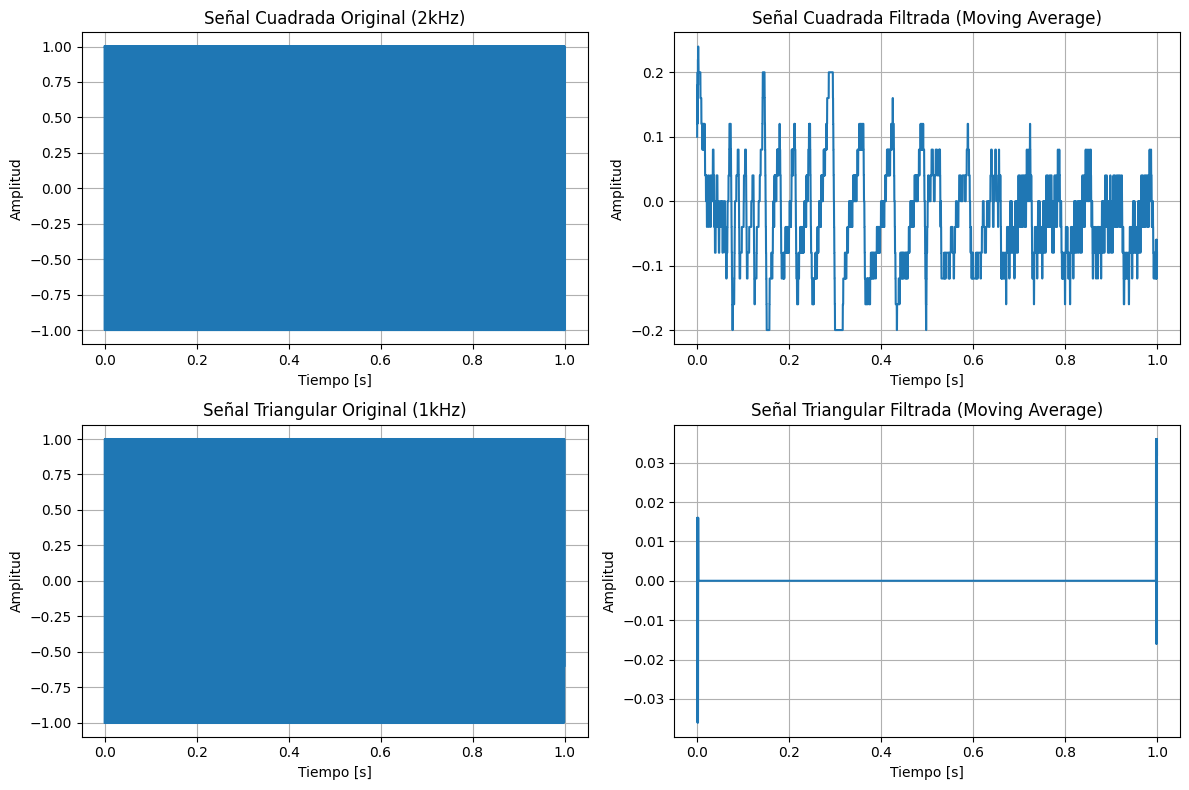

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros de la señal
fs = 10000  # Frecuencia de muestreo 10 kHz
t = np.arange(0, 1, 1/fs)  # Tiempo de 1 segundo

# Generar señal cuadrada de 2 kHz y amplitud 1
freq_square = 2000  # Frecuencia de 2 kHz
square_wave = signal.square(2 * np.pi * freq_square * t)

# Generar señal triangular de 1 kHz y amplitud 1
freq_triangle = 1000  # Frecuencia de 1 kHz
triangle_wave = signal.sawtooth(2 * np.pi * freq_triangle * t, 0.5)  # Señal triangular

# Definimos el filtro Moving Average
def moving_average(signal, window_size):
    window = np.ones(window_size) / window_size
    return np.convolve(signal, window, mode='same')

# Aplicamos el filtro de Promedio Móvil (Moving Average)
window_size = 50  # Tamaño de la ventana del promedio móvil
square_filtered = moving_average(square_wave, window_size)
triangle_filtered = moving_average(triangle_wave, window_size)

# Graficamos los resultados
plt.figure(figsize=(12, 8))

# Señal cuadrada original y filtrada
plt.subplot(2, 2, 1)
plt.plot(t, square_wave, label="Señal Cuadrada (2kHz)")
plt.title("Señal Cuadrada Original (2kHz)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(t, square_filtered, label="Cuadrada Filtrada (Moving Average)")
plt.title("Señal Cuadrada Filtrada (Moving Average)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)

# Señal triangular original y filtrada
plt.subplot(2, 2, 3)
plt.plot(t, triangle_wave, label="Señal Triangular (1kHz)")
plt.title("Señal Triangular Original (1kHz)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(t, triangle_filtered, label="Triangular Filtrada (Moving Average)")
plt.title("Señal Triangular Filtrada (Moving Average)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)

plt.tight_layout()
plt.show()

###### Análisis:
###### El filtro de promedio móvil reduce las variaciones rápidas y agudas de las señales, eliminando los componentes de alta frecuencia, lo cual es evidente en la señal cuadrada, que pierde sus transiciones abruptas.

In [6]:
###### Realizar un algoritmo de convolución en float

def convolution_float(x, h):
    """
    Realiza la convolución de dos señales en formato de punto flotante.
    
    :param x: Señal de entrada (array de floats)
    :param h: Respuesta al impulso (array de floats)
    :return: La convolución de x con h (array de floats)
    """
    # Longitudes de las señales
    x_len = len(x)
    h_len = len(h)
    
    # El tamaño de la señal de salida será len(x) + len(h) - 1
    y_len = x_len + h_len - 1
    
    # Inicializamos la señal de salida con ceros
    y = [0.0] * y_len
    
    # Realizamos la convolución manualmente
    for n in range(y_len):
        for k in range(h_len):
            if 0 <= n - k < x_len:
                y[n] += x[n - k] * h[k]
    
    return y

# Ejemplo de uso
x = [0.5, 1.5, 2.5, 3.5]  # Señal de entrada
h = [0.2, 0.4, 0.6]       # Filtro (respuesta al impulso)

# Realizamos la convolución
y = convolution_float(x, h)

# Mostramos el resultado
print("Resultado de la convolución (en floats):")
print(y)

Resultado de la convolución (en floats):
[0.1, 0.5, 1.4000000000000001, 2.6, 2.9000000000000004, 2.1]


In [7]:
######   Realizar un algoritmo de convolución en float y en punto fijo (por ejemplo usando 'fixedpoint')

from fixedpoint import FixedPoint

def convolution_fixed_point(x, h, word_len=16, frac_len=8):
    """
    Realiza la convolución de dos señales utilizando números en punto fijo.
    
    :param x: Señal de entrada (array de floats o enteros)
    :param h: Respuesta al impulso (array de floats o enteros)
    :param word_len: Longitud total del número en punto fijo (bits)
    :param frac_len: Número de bits para la parte fraccional
    :return: La convolución de x con h (array de números en punto fijo)
    """
    # Convertir las señales a punto fijo
    x_fixed = [FixedPoint(value, signed=True, m=word_len, n=frac_len) for value in x]
    h_fixed = [FixedPoint(value, signed=True, m=word_len, n=frac_len) for value in h]
    
    # Longitudes de las señales
    x_len = len(x_fixed)
    h_len = len(h_fixed)
    
    # El tamaño de la señal de salida será len(x) + len(h) - 1
    y_len = x_len + h_len - 1
    
    # Inicializamos la señal de salida con ceros en punto fijo
    y_fixed = [FixedPoint(0, signed=True, m=word_len, n=frac_len) for _ in range(y_len)]
    
    # Realizamos la convolución manualmente
    for n in range(y_len):
        for k in range(h_len):
            if 0 <= n - k < x_len:
                y_fixed[n] += x_fixed[n - k] * h_fixed[k]
    
    return y_fixed

# Ejemplo de uso
x = [0.5, 1.5, 2.5, 3.5]  # Señal de entrada
h = [0.2, 0.4, 0.6]       # Filtro (respuesta al impulso)

# Realizamos la convolución en punto fijo
y_fixed = convolution_fixed_point(x, h, word_len=16, frac_len=8)

# Mostramos el resultado
print("Resultado de la convolución en punto fijo:")
for y in y_fixed:
    print(float(y))  # Mostramos como número de punto flotante para facilitar la interpretación

Resultado de la convolución en punto fijo:
0.099609375
0.498046875
1.396484375
2.595703125
2.8984375
2.10546875


In [8]:
######   comparar tiempos de la funcion creada para convolucionar en punto flotante contra np.convolve

import numpy as np
import timeit

# Nuestra función de convolución en punto flotante
def convolution_float(x, h):
    x_len = len(x)
    h_len = len(h)
    y_len = x_len + h_len - 1
    y = [0.0] * y_len
    
    for n in range(y_len):
        for k in range(h_len):
            if 0 <= n - k < x_len:
                y[n] += x[n - k] * h[k]
    
    return y

# Parámetros de la señal (más grande para una comparación más representativa)
x = np.random.rand(1000).tolist()  # Señal aleatoria de longitud 1000
h = np.random.rand(500).tolist()   # Filtro aleatorio de longitud 500

# Definimos las pruebas con timeit
float_time = timeit.timeit('convolution_float(x, h)', 
                           globals=globals(), number=10)

numpy_time = timeit.timeit('np.convolve(x, h)', 
                           globals=globals(), number=10)

# Mostramos los resultados
print(f"Tiempo de convolución con nuestra función en punto flotante: {float_time:.5f} segundos")
print(f"Tiempo de convolución con np.convolve: {numpy_time:.5f} segundos")

######  CONCLUSION: se observa claramente que la funcion proporcionada por numpy es mucho mas eficiente en tiempo que la creada manualmente

Tiempo de convolución con nuestra función en punto flotante: 0.63185 segundos
Tiempo de convolución con np.convolve: 0.00132 segundos


In [ ]:
######   comparar tiempos de la funcion creada para convolucionar en punto fijo contra np.convolve

from fixedpoint import FixedPoint
import numpy as np
import timeit

# Función de convolución en punto fijo
def convolution_fixed_point(x, h, word_len=16, frac_len=8):
    x_fixed = [FixedPoint(value, signed=True, m=word_len, n=frac_len) for value in x]
    h_fixed = [FixedPoint(value, signed=True, m=word_len, n=frac_len) for value in h]
    
    x_len = len(x_fixed)
    h_len = len(h_fixed)
    y_len = x_len + h_len - 1
    
    y_fixed = [FixedPoint(0, signed=True, m=word_len, n=frac_len) for _ in range(y_len)]
    
    for n in range(y_len):
        for k in range(h_len):
            if 0 <= n - k < x_len:
                y_fixed[n] += x_fixed[n - k] * h_fixed[k]
    
    return y_fixed

# Parámetros de la señal
x = np.random.rand(1000).tolist()  # Señal aleatoria de longitud 1000
h = np.random.rand(500).tolist()   # Filtro aleatorio de longitud 500

# Definimos las pruebas con timeit
fixed_point_time = timeit.timeit('convolution_fixed_point(x, h)', 
                                 globals=globals(), number=10)

numpy_time = timeit.timeit('np.convolve(x, h)', 
                           globals=globals(), number=10)

# Mostramos los resultados
print(f"Tiempo de convolución en punto fijo: {fixed_point_time:.5f} segundos")
print(f"Tiempo de convolución con np.convolve: {numpy_time:.5f} segundos")

######  CONCLUSION: se observa claramente que la funcion proporcionada por numpy es mucho mas eficiente en tiempo que la creada manualmente

In [39]:
######   comparar el error a la salida de la funcion creada para convolucionar en punto flotante contra np.convolve

import numpy as np
import timeit

# Nuestra función de convolución en punto flotante
def convolution_float(x, h):
    x_len = len(x)
    h_len = len(h)
    y_len = x_len + h_len - 1
    y = [0.0] * y_len
    
    for n in range(y_len):
        for k in range(h_len):
            if 0 <= n - k < x_len:
                y[n] += x[n - k] * h[k]
    
    return y

# Definimos una función para calcular el MSE (Error Cuadrático Medio)
def mse(y1, y2):
    y1 = np.array(y1)
    y2 = np.array(y2)
    return np.mean((y1 - y2) ** 2)

# Parámetros de la señal
x = np.random.rand(1000).tolist()  # Señal aleatoria de longitud 1000
h = np.random.rand(500).tolist()   # Filtro aleatorio de longitud 500

# Resultado de la convolución con nuestra función de punto flotante
y_float = convolution_float(x, h)

# Resultado de la convolución con np.convolve
y_numpy = np.convolve(x, h)

# Comparación de la diferencia de error entre las dos funciones
# Error absoluto promedio
error_absoluto_promedio = np.mean(np.abs(np.array(y_float) - np.array(y_numpy)))

# Error cuadrático medio (MSE)
error_cuadratico_medio = mse(y_float, y_numpy)

# Mostrar los resultados
print(f"Error absoluto promedio: {error_absoluto_promedio:.10f}")
print(f"Error cuadrático medio (MSE): {error_cuadratico_medio:.10f}")

Error absoluto promedio: 0.0000000000
Error cuadrático medio (MSE): 0.0000000000


In [40]:
######   comparar el error a la salida de la funcion creada para convolucionar en punto fijo contra np.convolve

from fixedpoint import FixedPoint
import numpy as np

# Función de convolución en punto fijo
def convolution_fixed_point(x, h, word_len=16, frac_len=8):
    x_fixed = [FixedPoint(value, signed=True, m=word_len, n=frac_len) for value in x]
    h_fixed = [FixedPoint(value, signed=True, m=word_len, n=frac_len) for value in h]
    
    x_len = len(x_fixed)
    h_len = len(h_fixed)
    y_len = x_len + h_len - 1
    
    y_fixed = [FixedPoint(0, signed=True, m=word_len, n=frac_len) for _ in range(y_len)]
    
    for n in range(y_len):
        for k in range(h_len):
            if 0 <= n - k < x_len:
                y_fixed[n] += x_fixed[n - k] * h_fixed[k]
    
    return y_fixed

# Definimos una función para calcular el MSE (Error Cuadrático Medio)
def mse(y1, y2):
    y1 = np.array(y1)
    y2 = np.array(y2)
    return np.mean((y1 - y2) ** 2)

# Parámetros de la señal
x = np.random.rand(1000).tolist()  # Señal aleatoria de longitud 1000
h = np.random.rand(500).tolist()   # Filtro aleatorio de longitud 500

# Resultado de la convolución con punto fijo
y_fixed = convolution_fixed_point(x, h)

# Convertir el resultado de punto fijo a punto flotante para comparación
y_fixed_float = [float(y) for y in y_fixed]

# Resultado de la convolución con np.convolve
y_numpy = np.convolve(x, h)

# Comparación de la diferencia de error entre las dos funciones
# Error absoluto promedio
error_absoluto_promedio = np.mean(np.abs(np.array(y_fixed_float) - np.array(y_numpy)))

# Error cuadrático medio (MSE)
error_cuadratico_medio = mse(y_fixed_float, y_numpy)

# Mostrar los resultados
print(f"Error absoluto promedio: {error_absoluto_promedio:.10f}")
print(f"Error cuadrático medio (MSE): {error_cuadratico_medio:.10f}")

Error absoluto promedio: 0.0119423820
Error cuadrático medio (MSE): 0.0002285249


CORRECION PUNTO 1: En esta parte se coloco el codigo con el cual se puede ver como se suavizan los bordes de la onda cuadrada al utilizar el moveing average.

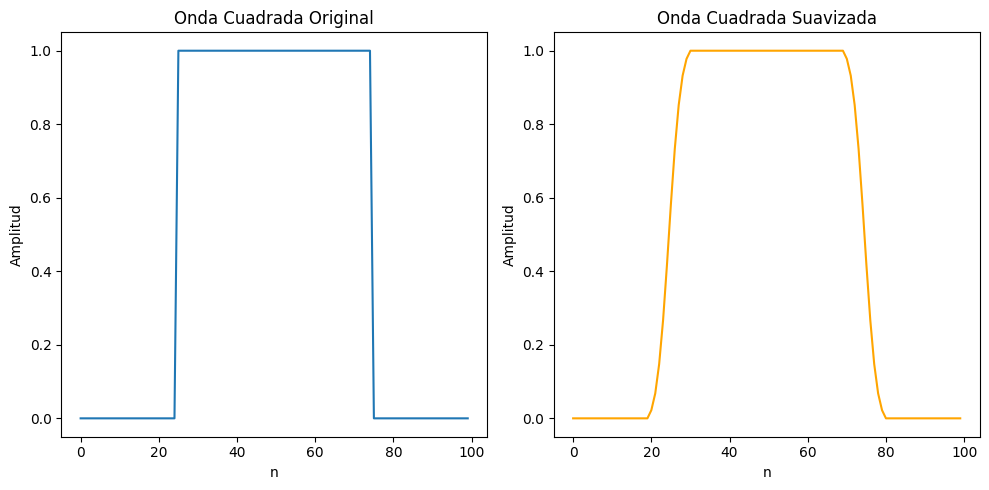

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función de promedio móvil con una ventana gaussiana
def moving_average(signal, window_size, sigma=1.0):
    # Creamos una ventana gaussiana
    t = np.linspace(-1, 1, window_size)
    window = np.exp(-0.5 * (t / sigma)**2)
    window /= np.sum(window)  # Normalizamos la ventana
    
    # Aplicamos la convolución (modo 'same' para mantener el mismo tamaño de la señal)
    return np.convolve(signal, window, mode='same')

# Creamos una onda cuadrada como señal de ejemplo
length = 100  # Longitud de la señal
square_wave = np.zeros(length)
square_wave[25:75] = 1  # Definimos una onda cuadrada

# Aplicamos el filtro de promedio móvil con ventana gaussiana
window_size = 11  # Tamaño de la ventana
smoothed_signal = moving_average(square_wave, window_size, sigma=0.5)

# Graficamos la onda cuadrada original y la señal suavizada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(square_wave, label="Onda Cuadrada Original")
plt.title("Onda Cuadrada Original")
plt.xlabel("n")
plt.ylabel("Amplitud")

plt.subplot(1, 2, 2)
plt.plot(smoothed_signal, label="Onda Cuadrada Suavizada", color='red')
plt.title("Onda Cuadrada Suavizada")
plt.xlabel("n")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()